#УЧП эллиптического типа

Рассмотрим уравнение Пуассона:

$$\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = f(x, y), \quad (x, y) \in[0, 1]\times[0, 1]$$
с граничными условиями:
$$u(x,0) = f_1(x), \quad u(x,1) = f_2(x),$$
$$u(0,y) = g_1(y), \quad u(1,y) = g_2(y).$$


##Разностная схема «крест»

Если для уравнения Пуассона приблизить производные формулами второго порядка аппроксимации, получится следующее выражение:

$$
\frac{u_{m-1, l}-2 u_{m, l}+u_{m+1, l}}{h^2}+\frac{u_{m, l-1}-2 u_{m, l}+u_{m, l+1}}{h^2}=f_{m, l}
$$

Из него можно получить выражение для значения в центральной точке «креста»:


$$
u_{m, l}=\frac{1}{4}\left(u_{m+1, l}+u_{m-1, l}+u_{m, l+1}+u_{m, l-1}-h^2 f\left(x_i, y_j\right) \right)
$$
Такой вид записи уравнения называется каноническим. По построению схема обладает порядком аппроксимации $O(h^2)$.

Для подобной разностой задачи справедлив сеточный принцип максимума, а именно: каждое решение разностного уравнения Лапласа достигает своего минимального и максимального значения на границе сеточной области.

В таком случае уравнение Лапласа с нулевыми граничными условиями имеет лишь тривиальное решение. А если система с нулевым вектором правых частей имеет лишь тривиальное решение, то она однозначно разрешима при любой правой части. В таком случае поставленная нами разностная задача однозначно разрешима.



##Итерационные методы

Метод простых итераций (МПИ) записывается для системы сеточных уравнений
в следующем виде:

$$
    u_{m,l}^{i+1} = u_{m,l}^{i} +  \tau_(\Lambda u_{m,l}^i-f_{m,l})
$$


$$
\Lambda u_{m,l}^i = \frac{u_{m-1, l}^i-2 u_{m, l}^i+u_{m+1, l}^i}{h^2}+\frac{u_{m, l-1}^i-2 u_{m, l}^i+u_{m, l+1}^i}{h^2};
$$



Правильный выбор параметра $\tau$ имеет ключевое значение для сходимости МПИ. Условие сходимости метода требует, чтобы $\tau$ удовлетворяло неравенству:

$$
0 < \tau < \frac{2}{\lambda_{\text{max}}},
$$

где $\lambda_{\text{max}}$ — максимальное собственное число разностного оператора Лапласа. Оптимальное значение параметра $\tau$ можно выбрать исходя из спектральных свойств матрицы $\Lambda$. Например, если $\lambda_{\text{min}}$ и $\lambda_{\text{max}}$ — минимальное и максимальное собственные числа оператора $\Lambda$, то оптимальное значение $\tau$ определяется формулой:

$$
\tau_{\text{opt}} = \frac{2}{\lambda_{\text{min}} + \lambda_{\text{max}}}.
$$

При таком выборе параметра достигается наибольшая скорость сходимости.


Для ускорения сходимости МПИ можно на каждой итерации использовать определённое значение параметра $\tau$:

$$
    u_{m,l}^{i+1} = u_{m,l}^{i} +  \tau_{i+1}(\Lambda u_{m,l}^i-f_{m,l})
$$


Минимизируя норму невязки на $i$-ой итерации можно получить, что оптимальней всего использовать

$$
    \tau_j = \left[      \frac{\lambda_{\text{max}} + \lambda_{\text{min}}}{2}   + \frac{\lambda_{\text{max}} - \lambda_{\text{min}}}{2}   \cos\left( \frac{\pi (2j-1)}{2k} \right)\right]^{-1},
$$
где $j = 1,2, \dots i.$ Представленный метод называется двухслойным чебышевским итерационным методом.


Метод верхней релаксации тоже улучшает сходимость по сравнению с МПИ. Формула для метода верхней релаксации:

$$
u_{m,l}^{i+1} = (1 - \omega) u_{m,l}^{i} + \frac{\omega}{4} (u_{m-1,l}^{i+1} + u_{m+1,l}^{i} + u_{m,l-1}^{i+1} + u_{m,l+1}^{i} - h^2 f_{m,l})
$$
где $\omega$ — параметр релаксации, оптимальное значение которого подбирается эмпирически.




##Уравнение Лапласа

Рассмотрим уравнение Лапласа:

$$\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} =0, \quad (x, y) \in[0, 1]\times[0, 1]$$
с граничными условиями:
$$u(x,0) = f_1(x), \quad u(x,1) = f_2(x),$$
$$u(0,y) = g_1(y), \quad u(1,y) = g_2(y).$$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LaplaceEquationSolver:
    def __init__(self, N, f1, f2, g1, g2, num_iter, tau=0.5):
        self.N = N # Number of spatial steps
        self.num_iter = num_iter # Number of iterations
        self.tau = tau # SIR parameter
        self.h = 1 / (N - 1) # Spatial step size

        self.x = np.linspace(0, 1, N) # x grid
        self.y = np.linspace(0, 1, N) # y grid

        self.u = np.zeros((N, N)) # Solution matrix

        # Set boundary conditions
        self.u[:, 0] = f1(self.x)
        self.u[:, -1] = f2(self.x)
        self.u[0, :] = g1(self.y)
        self.u[-1, :] = g2(self.y)

    def solve(self):
        for iteration in range(self.num_iter):
            u_new = self.u.copy()
            for i in range(1, self.N-1):
                for j in range(1, self.N-1):
                    u_new[i, j] = self.u[i, j] + self.tau * 0.25 * (self.u[i+1, j] + self.u[i-1, j] + self.u[i, j+1] + self.u[i, j-1] - 4 * self.u[i, j])

            self.eps = np.linalg.norm(u_new - self.u)
            self.u = u_new


    def plot(self):
        X, Y = np.meshgrid(self.x, self.y)
        plt.contourf(X, Y, self.u, 20, cmap='viridis')
        plt.colorbar()
        plt.title('Numerical solution of Laplace equation')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

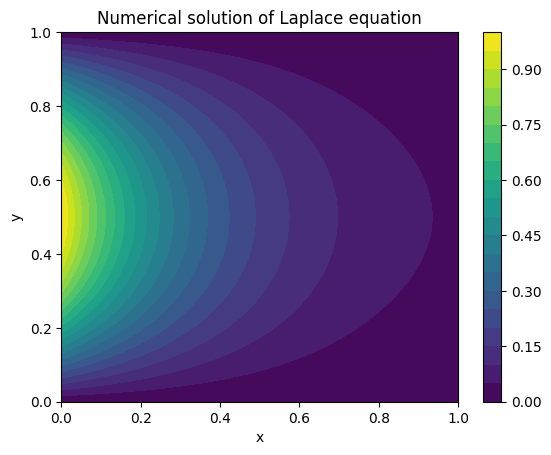

In [ ]:
def f1(x):
    return np.sin(np.pi * x)

def f2(x):
    return np.sin(np.pi * x) * np.exp(-np.pi)

def g1(y):
    return 0

def g2(y):
    return 0

N = 50
num_iter = 3000

solver = LaplaceSolver(N, f1, f2, g1, g2, num_iter)
solver.solve()
solver.plot()